## Домашняя работа 3

In [1]:
import vk
from credentials import *
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 
import re
from pymystem3 import Mystem
import nltk
from nltk.corpus import stopwords
from nltk.collocations import *
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from wordcloud import WordCloud

In [2]:
session = vk.AuthSession(id_app, login, password, scope='wall')
vk_api = vk.API(session)

**Задача 1. Формирование корпуса текстов** (10 баллов) 

Найдите две или более группы, которые публикуют достаточно содержательные посты (например, новости и т.п.). Тематика групп должна быть различной. 

С помощью [wall.get](https://vk.com/dev/wall.get) скачайте посты данных групп и сформируйте корпуса текстов, используя возможности [pandas](https://pythonspot.com/category/pandas/).

In [3]:
tv = vk_api.wall.get(domain = 'temnie_vremena', count = 100, filter = 'owner', version = 5.73)

In [73]:
duna = vk_api.wall.get(domain = 'dune_2018', count = 100, version = 5.73)

Создаю датафреймы из скачанных списков:

In [74]:
df_tv = pd.DataFrame(tv, columns=['text'])
df_duna = pd.DataFrame(duna, columns=['text'])

Посмотрим на один из них:

In [6]:
df_tv[:10]

,text
0,338
1,"{'date': 1519178402, 'to_id': -129758069, 'fro..."
2,"{'copy_post_id': 295, 'date': 1520154380, 'to_..."
3,"{'date': 1519972491, 'to_id': -129758069, 'fro..."
4,"{'date': 1519813901, 'to_id': -129758069, 'fro..."
5,"{'date': 1519606934, 'to_id': -129758069, 'fro..."
6,"{'date': 1519313243, 'to_id': -129758069, 'fro..."
7,"{'date': 1519002712, 'to_id': -129758069, 'fro..."
8,"{'date': 1518941032, 'to_id': -129758069, 'fro..."
9,"{'date': 1518859256, 'to_id': -129758069, 'fro..."


**Задача 2. Предобработка ** (15 баллов)

Предобработайте корпуса текстов: 
* Очистите тексты от мусора, используя [регулярные выражения](https://docs.python.org/2/library/re.html)
* [Лемматизируйте текст](https://github.com/arinaaageeva/Lemmatization)
* Удалите стоп-слова

Список стоп-слов можно получить с помощью модуля [stop-words](https://pypi.python.org/pypi/stop-words)

In [7]:
m = Mystem()

Определяем функцию, которая удаляет лишнее и лемматизирует

In [8]:
def clean_lem(text):
    text = str(text)
    text = text.lower()
    string = re.findall('[А-Яа-яёЁ]+', text)
    lemmas = m.lemmatize(' '.join(string))
    return ''.join(lemmas)

Пробуем эту функцию запустить на весь корпус с помощью другой функции - и это не работает. 

In [9]:
def predpr(dataset):
    for i in range (len(dataset.text)):
        clean_lem(dataset['text'][i])
    return dataset
predpr(df_tv[:10])

,text
0,338
1,"{'date': 1519178402, 'to_id': -129758069, 'fro..."
2,"{'copy_post_id': 295, 'date': 1520154380, 'to_..."
3,"{'date': 1519972491, 'to_id': -129758069, 'fro..."
4,"{'date': 1519813901, 'to_id': -129758069, 'fro..."
5,"{'date': 1519606934, 'to_id': -129758069, 'fro..."
6,"{'date': 1519313243, 'to_id': -129758069, 'fro..."
7,"{'date': 1519002712, 'to_id': -129758069, 'fro..."
8,"{'date': 1518941032, 'to_id': -129758069, 'fro..."
9,"{'date': 1518859256, 'to_id': -129758069, 'fro..."


Так как на отдельных примерах функция clean_lem работает прекрасно - я делаю вывод, что проблема не в ней, а в том, что я не могу заставить ее нормально ходить по моему датафрейму. Исправить проблему у меня не получилось, так что я сделала по-другому

In [10]:
clean_lem(df_tv['text'][12])

'валентиновдевать в стена наш школа подобный не быть никогда но ветер перемена может еще и не такой встречать письмо который перевертывать множество ваш сердцец юный сладкий и трогательный волшебный вишенка поздравлять вы с день весь влюбленный любить и знать что этот нежность и свежесть амортенция дриада скоро заканчиваться уступать место темный черничный вино взрослый страсть пить свой юность жадно а мы вы помогать редакция журнал валентиновдевать в стена наш школа подобный не быть никогда но ветер перемена может еще и не такой встречать письмо который перевертывать множество ваш сердцец юный сладкий и трогательный волшебный вишенка поздравлять вы с день весь влюбленный любить и знать что этот нежность и свежесть амортенция дриада скоро заканчиваться уступать место темный черничный вино взрослый страсть пить свой юность жадно а мы вы помогать редакция журнал валентиновдевать в стена наш школа подобный не быть никогда но ветер перемена может еще и не такой встречать письмо который пер

Так как у меня не получилось запустить функцию на датафрейм, я создала лист и почистила свои данные, полученные из wall.get таким образом:

In [11]:
tv_lst = []
for i in range(100):
    a = clean_lem(tv[i])
    tv_lst.append(a)

In [76]:
duna_lst = []
for i in range(100):
    a = clean_lem(duna[i])
    duna_lst.append(a)

И удаляю лишние пустые элементы

In [13]:
duna_lst.pop(0)
tv_lst.pop(0)

''

Импортиртирую модуль со стоп-словами.

In [14]:
stop_w = stopwords.words('russian')

Добавила те слова, которые оказались в топе, но явно не осмысслены

In [15]:
new_stw = ['это', 'свой', 'ваш', 'весь', 'который', 'наш']
stop_w += new_stw

Функция, с помощью которой мы уберем стоп-слова из наших текстов.

In [16]:
def stw(lst, stop_w):
    result = []
    for i in lst:
        lst_w = i.split(' ')
        result.append(' '.join([word for word in lst_w if (word not in stop_w)]))
    return result

In [17]:
tv_lst_stw = stw(tv_lst, stop_w)

In [80]:
duna_lst_stw = stw(duna_lst, stop_w)

Уберем '\n'

In [19]:
def no_n(text):
    string = re.sub('\n', '', text)
    return ''.join(string)

In [20]:
tv_final = []
for i in range(99):
    a = no_n(tv_lst_stw[i])
    tv_final.append(a)

In [81]:
duna_final = []
for i in range(99):
    a = no_n(duna_lst_stw[i])
    duna_final.append(a)

** Задача 3. Выделение признаков** (5 баллов)

Для каждой группы получите список топ-токенов и выведите .

In [22]:
vectorizer_tv = TfidfVectorizer(stop_words = stop_w).fit(tv_final)
TV = vectorizer_tv.fit_transform(tv_final)
indices_tv = np.argsort(vectorizer_tv.idf_)
features_tv = vectorizer_tv.get_feature_names()
top_features_tv = [features_tv[i] for i in indices_tv[:10]]
print (top_features_tv)

['дорогой', 'день', 'первый', 'мочь', 'каждый', 'сегодня', 'год', 'мир', 'тайна', 'друг']


C:\Users\Asus\Anaconda3\envs\mllecture\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Повторяем то же самое для второго корпуса

In [82]:
vectorizer_duna = TfidfVectorizer(stop_words = stop_w).fit(duna_final)
D = vectorizer_duna.fit_transform(duna_final)
indices_duna = np.argsort(vectorizer_duna.idf_)
features_duna = vectorizer_duna.get_feature_names()
top_features_duna = [features_duna[i] for i in indices_duna[:10]]
print (top_features_duna)

['дюна', 'мастер', 'игра', 'игрок', 'человек', 'герберт', 'френк', 'год', 'самый', 'вдохновение']


C:\Users\Asus\Anaconda3\envs\mllecture\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


**Задача 4. Визуализация** (5 баллов)

Визуализируйте токены для каждого сообщества с помощью [WORDCLOUD](https://python-graph-gallery.com/wordcloud/)

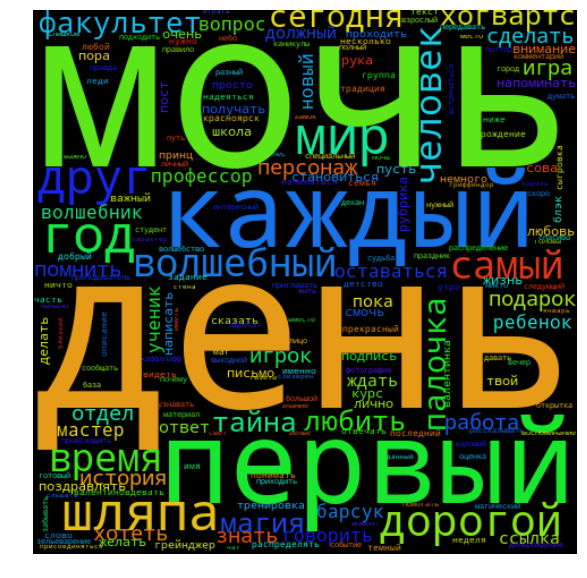

In [83]:
wordcloud_tv = WordCloud(width=480, height=480, margin=0).generate(str(tv_final))
plt.imshow(wordcloud_tv, interpolation='bilinear')
plt.margins()
plt.rcParams["figure.figsize"] = (10,10)
plt.axis("off")
plt.show()

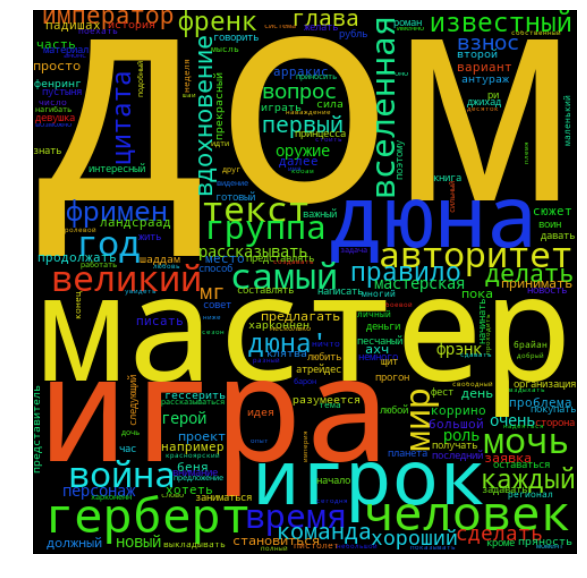

In [84]:
wordcloud_duna = WordCloud(width=480, height=480, margin=0).generate(str(duna_final))
plt.imshow(wordcloud_duna, interpolation='bilinear')
plt.margins()
plt.rcParams["figure.figsize"] = (7,7)
plt.axis("off")
plt.show()

**Задача 5. Поиск коллокаций** (15 баллов)

Для каждого сообщества найдите статистические значиммые коллокации с помощью PMI

Отберем только те коллокации, которые встречаются чаще, чем 5 раз. 

In [61]:
bigram_measures_tv = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(word_tokenize(' '.join(tv_final)))
finder.apply_freq_filter(5)
finder.nbest(bigram_measures_tv.pmi, 20)

[('джоин', 'рпг'),
 ('купить', 'супер'),
 ('ричард', 'петтигря'),
 ('добро', 'пожаловать'),
 ('супер', 'цена'),
 ('цена', 'р'),
 ('присоединяться', 'поздравление'),
 ('гарри', 'поттер'),
 ('леди', 'джентльмен'),
 ('беллатриса', 'блэк'),
 ('мария', 'принц'),
 ('сей', 'пора'),
 ('ссылка', 'ниже'),
 ('отдел', 'тайна'),
 ('волшебник', 'волшебница'),
 ('стена', 'школа'),
 ('лично', 'рука'),
 ('распределять', 'шляпа'),
 ('ученик', 'преподаватель'),
 ('часть', 'игра')]

А теперь посмотрим на триграммы

In [62]:
trigram_measures_tv = nltk.collocations.TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words(word_tokenize(' '.join(tv_final)))
finder.apply_freq_filter(4)
finder.nbest(trigram_measures_tv.pmi, 20)

[('аккаунт', 'джоин', 'рпг'),
 ('супер', 'цена', 'р'),
 ('купить', 'супер', 'цена'),
 ('р', 'купить', 'супер'),
 ('цена', 'р', 'купить'),
 ('подробность', 'сообщать', 'лично'),
 ('помнить', 'зря', 'пятый'),
 ('зря', 'пятый', 'день'),
 ('пятый', 'день', 'ноябрь'),
 ('отдел', 'тайна', 'напоминать'),
 ('мастер', 'работа', 'игрок'),
 ('распределять', 'шляпа', 'оставаться')]

И для второго корупса:

In [85]:
bigram_measures_duna = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(word_tokenize(' '.join(duna_final)))
finder.apply_freq_filter(5)
finder.nbest(bigram_measures_duna.pmi, 20)

[('мечник', 'гиназа'),
 ('шаи', 'хулуд'),
 ('девушка', 'вздыхать'),
 ('покупать', 'слон'),
 ('ри', 'фест'),
 ('хасимир', 'фенринг'),
 ('беня', 'гессерить'),
 ('новый', 'рассвет'),
 ('падишах', 'император'),
 ('сетка', 'роль'),
 ('мг', 'наваждение'),
 ('вдохновение', 'цитата'),
 ('племя', 'фримен'),
 ('мастерская', 'группа'),
 ('известный', 'вселенная'),
 ('император', 'шаддам'),
 ('френк', 'герберт'),
 ('фрэнк', 'герберт'),
 ('игрок', 'персонаж'),
 ('глава', 'дом')]

In [86]:
trigram_measures_duna = nltk.collocations.TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words(word_tokenize(' '.join(duna_final)))
finder.apply_freq_filter(4)
finder.nbest(trigram_measures_duna.pmi, 20)

[('падишах', 'император', 'шаддам'),
 ('дюна', 'новый', 'рассвет'),
 ('фрэнк', 'герберт', 'фрэнк'),
 ('френк', 'герберт', 'дюна'),
 ('герберт', 'фрэнк', 'герберт'),
 ('глава', 'дом', 'ландсраад'),
 ('дюна', 'фрэнк', 'герберт'),
 ('герберт', 'дюна', 'фрэнк'),
 ('фрэнк', 'герберт', 'дюна'),
 ('игра', 'дюна', 'новый'),
 ('герберт', 'дюна', 'мастер')]